In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [4]:
cd drive/MyDrive

/content/drive/MyDrive


In [5]:
import pandas as pd

file_path="train.csv"
df = pd.read_csv(file_path)

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
print('Lenght of df ',len(df))

Lenght of df  7613


In [8]:


def calculate_duplicate_percentages(df):
    duplicate_counts = df.duplicated(keep=False).sum()  # Count all duplicates
    total_rows = len(df)
    duplicate_percentage = (duplicate_counts / total_rows) * 100
    print(f'Percentage of duplicated records in df: {duplicate_percentage:.2f}%')
    return duplicate_percentage


def get_percentage_null_values_column(df,column_name):

    total_records = len(df)

    missing_records = df[column_name].isnull().sum()

    percentage_missing = (missing_records / total_records) * 100

    print(f'Percentage of missing records in column_name: {percentage_missing:.2f}%')

    return percentage_missing



In [9]:
get_percentage_null_values_column(df,'location')
get_percentage_null_values_column(df,'keyword')
calculate_duplicate_percentages(df)

Percentage of missing records in column_name: 33.27%
Percentage of missing records in column_name: 0.80%
Percentage of duplicated records in df: 0.00%


0.0

In [10]:
df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [11]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
df = df.dropna()

# Dropping duplicated values
# By default, this keeps the first occurrence and drops subsequent duplicates.
df = df.drop_duplicates()

len(df)

5080

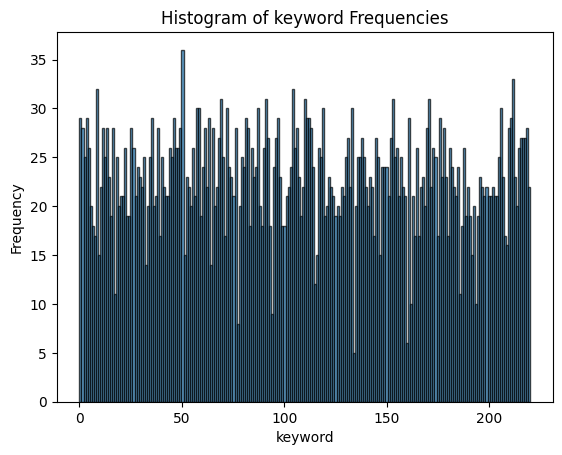

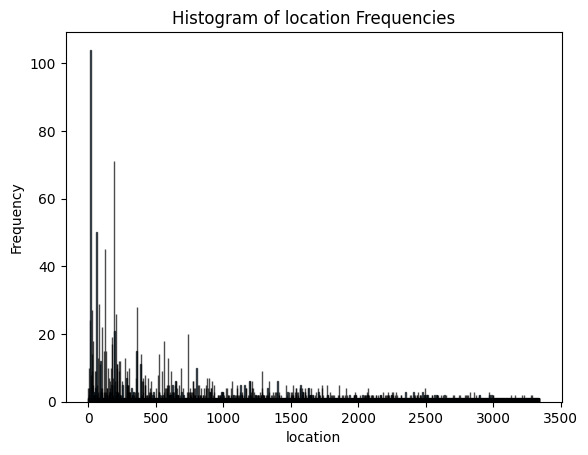

In [13]:
import matplotlib.pyplot as plt

def plot_hist_column(df,name):
  unique_strings = df[name].unique()
  string_to_int = {string: i for i, string in enumerate(unique_strings)}

  # Plot histogram
  plt.hist( df[name].map(string_to_int), bins=len(unique_strings), alpha=0.7, edgecolor='black')
  # plt.xticks(ticks=range(len(unique_strings)), labels=unique_strings)
  plt.xlabel(name)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {name} Frequencies')
  plt.show()

plot_hist_column(df,'keyword')
plot_hist_column(df,'location')

In [18]:
df.describe()

,id,target,text_length,keyword_map
count,5080.000000,5080.000000,5080.000000,5080.000000
mean,5407.112598,0.432283,102.319882,108.885630
std,3116.359041,0.495442,33.405894,63.929913
min,48.000000,0.000000,8.000000,0.000000
25%,2728.750000,0.000000,79.000000,54.000000
50%,5360.500000,0.000000,109.000000,107.500000
75%,8086.000000,1.000000,134.000000,164.000000
max,10833.000000,1.000000,152.000000,220.000000


In [14]:
# Adding a new column for the length of each tweet
df['text_length'] = df['text'].apply(len)

# Descriptive statistics for text length
text_length_stats = df['text_length'].describe()

# Identifying abnormally long or short tweets
# Using 1.5*IQR to define outliers
Q1 = text_length_stats['25%']
Q3 = text_length_stats['75%']
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

# Counting outliers
num_short_outliers = df[df['text_length'] < outlier_threshold_low].shape[0]
num_long_outliers = df[df['text_length'] > outlier_threshold_high].shape[0]

# Calculating the ratio of disaster to non-disaster tweets
disaster_ratio = df['target'].value_counts(normalize=True) * 100

# Random sample of tweets for manual inspection
sample_tweets = df[['text', 'target']].sample(5)

# Displaying the results
print("Text Length Statistics:\n", text_length_stats)
print("\nOutlier Thresholds: Low =", outlier_threshold_low, ", High =", outlier_threshold_high)
print("\nNumber of Short Outliers:", num_short_outliers)
print("Number of Long Outliers:", num_long_outliers)
print("\nDisaster to Non-Disaster Tweet Ratio:\n", disaster_ratio)
print("\nSample Tweets:\n", sample_tweets)

Text Length Statistics:
 count    5080.000000
mean      102.319882
std        33.405894
min         8.000000
25%        79.000000
50%       109.000000
75%       134.000000
max       152.000000
Name: text_length, dtype: float64

Outlier Thresholds: Low = -3.5 , High = 216.5

Number of Short Outliers: 0
Number of Long Outliers: 0

Disaster to Non-Disaster Tweet Ratio:
 0    56.771654
1    43.228346
Name: target, dtype: float64

Sample Tweets:
                                                    text  target
4407  #hot  Funtenna: hijacking computers to send da...       0
3673  Kosciusko police investigating pedestrian fata...       1
5277  LA Times: Refugio oil spill may have been cost...       1
2221  @StephanieMarija 'light rain' was the forecast...       0
4907  Tell @BarackObama to rescind medals of 'honor'...       1


In [15]:
!pip install wordcloud

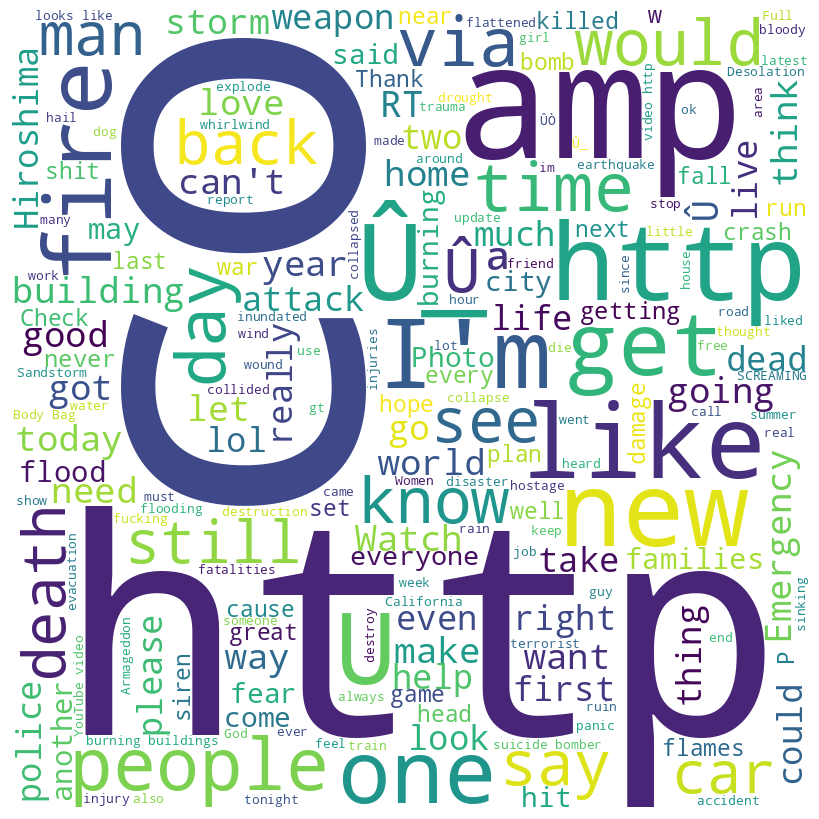

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
text = " ".join(review for review in df.text.dropna())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stopwords.words('english')),
                min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

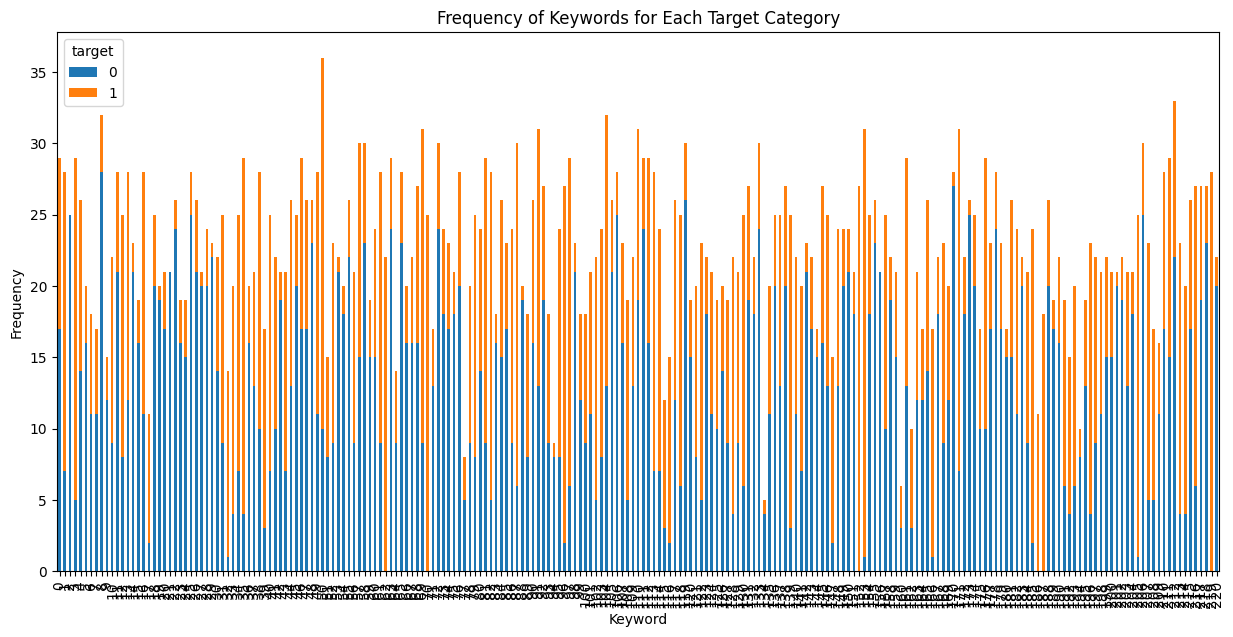

In [17]:


unique_strings = df['keyword'].unique()
string_to_int = {string: i for i, string in enumerate(unique_strings)}

df['keyword_map']=df['keyword'].map(string_to_int)

# Calculate frequency of each keyword for each target category
keyword_target_frequency = df.groupby(['keyword_map', 'target']).size().unstack(fill_value=0)

# Plotting - you can customize this as needed
keyword_target_frequency.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords for Each Target Category')
plt.show()

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(document):
    document = re.sub(r'https?://\S+|www\.\S+', '', document)
    document = re.sub(r'@\w+', '', document)  # Remove mentions
    document = re.sub(r'#\w+', '', document)  # Remove hashtags (or keep hashtags but remove '#' symbol)
    document = re.sub(r'[^a-zA-Z0-9\s]', '', document)
    document = re.sub(r'\d+', '', document)

    tokens = word_tokenize(document)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if len(word) > 2]  # Remove tokens with less than 3 letters
    tokens = [word.lower() for word in tokens]  # Lowercase all tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens


# Après avoir appliqué clean_text à chaque document
corpus = [' '.join(clean_text(doc)) for doc in df['text']]
corpus_str = ' '.join(corpus)
unique_tokens = set(word_tokenize(corpus_str))
print(f"Nombre de tokens uniques: {len(unique_tokens)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nombre de tokens uniques: 10356


In [45]:
from collections import Counter

token_counts = Counter(word_tokenize(corpus_str))
#Supprimer les mots qui apparaissent moins de 3 fois
reduced_vocab = [token for token, count in token_counts.items() if count >= 3]
print(f"Nombre de token apres la reduction :",len(reduced_vocab))
single_tokens = [token for token, count in token_counts.items() if count == 1]
print(f"Nombre de tokens qui apparaissent une seule fois: {len(single_tokens)}")

Nombre de token apres la reduction : 2918
Nombre de tokens qui apparaissent une seule fois: 5963


In [46]:
single_tokens[0:5]

['newsnigeria', 'hype', 'epl', 'visiting', 'cfc']

In [47]:
reduced_vocab[0:10]

['wholesale',
 'markets',
 'ablaze',
 'always',
 'try',
 'bring',
 'heavy',
 'breaking',
 'flag',
 'set']

In [48]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
lemmatized_corpus = [' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(doc)]) for doc in reduced_vocab]



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
lemmatized_corpus[0:10]

['wholesale',
 'market',
 'ablaze',
 'always',
 'try',
 'bring',
 'heavy',
 'break',
 'flag',
 'set']

In [50]:
def process_document(document):

    # Tokenize and clean the document
    tokens = clean_text(document)
    # Lemmatize the tokens if they are in the reduced vocabulary
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens if word in reduced_vocab]
    # Combine tokens back into a string
    return ' '.join(lemmatized_tokens)

In [51]:
df['processed_text'] = df['text'].apply(process_document)

In [52]:
df.head()

,id,keyword,location,text,target,text_length,keyword_map,processed_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,0,wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,0,always try bring heavy
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,0,break flag set ablaze aba
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,0,cry set ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,0,plus side look sky last night ablaze


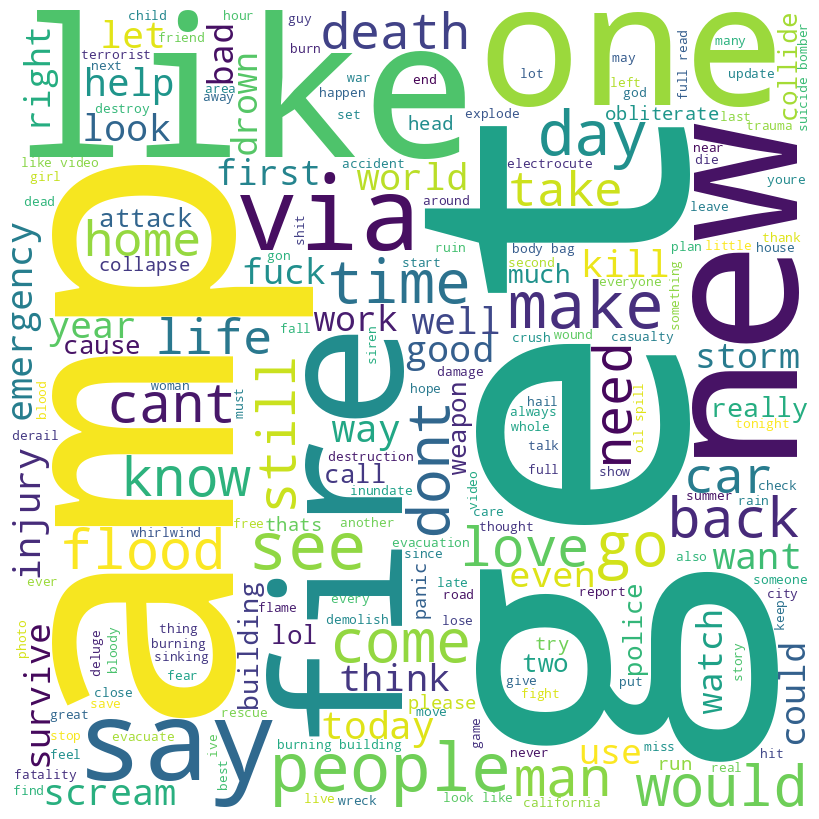

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
text = " ".join(review for review in df.processed_text)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stopwords.words('english')),
                min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()